### Imports and environemnt setup

In [23]:
import utils 
import pandas as pd

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import numpy as np

In [16]:
from_csv = True
csv_path = 'movies2.csv'
scaling_factor = 10000000

### Get data from API or load csv

In [17]:
if from_csv:
    movies_df = pd.read_csv(csv_path)
else:
    movies_dict = utils.get_movies_list(pages=20)
    all_movie_details = []
    for i in range(len(movies_dict)):
        movie_id = movies_dict[i]['id']
        movie_details = utils.get_movie_details(movie_id)
        all_movie_details.append(movie_details)
    movies_df = pd.DataFrame(all_movie_details)
    movies_df = movies_df[['id', 'budget', 'genres', 'popularity', 'revenue', 'title', 'release_date', 'runtime', 'vote_average']]


In [18]:
movies_df['budget'].min()

0

In [10]:
if not from_csv:
    movies_df.to_csv('movies2.csv', index=False)

### Training a basic model

In [19]:
model = KNeighborsRegressor(n_neighbors= 10)
model = RadiusNeighborsRegressor(radius= 10)
movies_df = movies_df.dropna()
X = movies_df[['budget']]/scaling_factor

y = movies_df[['revenue']]/scaling_factor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))

# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


Training set scores: mse 887.562472, mae 21.242854, r2 0.148301
Test set scores: mse 1499.012301, mae 25.288456, r2 0.181246


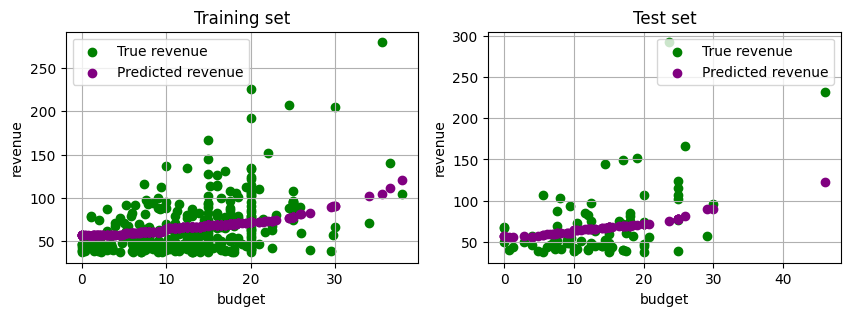

In [21]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train, y_train, color='green')
ax[0].scatter(X_train, reg.predict(X_train), color='purple')
ax[0].set_title('Training set')
ax[0].set_xlabel('budget')
ax[0].set_ylabel('revenue')
ax[0].legend(['True revenue', 'Predicted revenue'])
ax[0].grid()
ax[1].scatter(X_test, y_test, color='green')
ax[1].scatter(X_test, reg.predict(X_test), color='purple')
ax[1].set_title('Test set')
ax[1].set_xlabel('budget')
ax[1].set_ylabel('revenue')
ax[1].legend(['True revenue', 'Predicted revenue'])
ax[1].grid()

plt.show()

# plt.scatter(X_train, y_train, color='green')
# plt.scatter(X_train, reg.predict(X_train), color='purple')

### Getting the cast

In [48]:
i = 0

In [96]:
import numpy as np
i +=1
movie_id = movies_df['id'][i]
cast = utils.get_movie_cast(movies_df['id'][i])
popularities = [person['popularity'] for person in cast['cast']]
total_popularity = np.sum(popularities)
print(f"{movies_df[movies_df['id'] == movie_id]['title'].values} with popularity {total_popularity}")


["There's Something About Mary"] with popularity 395.28700000000003


In [97]:
i = 0
for movie_id in movies_df['id']: 
    cast = utils.get_movie_cast(movie_id)
    popularities = [person['popularity'] for person in cast['cast']]
    total_popularity = np.sum(popularities)
    print(f"{movies_df.iloc[i]['title']} with popularity {total_popularity}")
    # print(f"{movies_df.iloc[i]['title']} with popularity {total_popularity}")
    movies_df['average_popularity'] = total_popularity  
    i += 1


Avatar with popularity 300.119
Avengers: Endgame with popularity 1877.2150000000001
Avatar: The Way of Water with popularity 475.537
Titanic with popularity 568.845
Star Wars: The Force Awakens with popularity 940.38
Avengers: Infinity War with popularity 1465.2839999999999
Spider-Man: No Way Home with popularity 869.7710000000001
Jurassic World with popularity 429.29900000000004
The Lion King with popularity 204.57399999999998
The Avengers with popularity 749.3599999999999
Furious 7 with popularity 753.605
Top Gun: Maverick with popularity 534.154
Frozen II with popularity 438.143
Barbie with popularity 793.828
Avengers: Age of Ultron with popularity 898.027
The Super Mario Bros. Movie with popularity 404.61899999999997
Black Panther with popularity 398.124
Harry Potter and the Deathly Hallows: Part 2 with popularity 1084.552
Star Wars: The Last Jedi with popularity 719.408
Jurassic World: Fallen Kingdom with popularity 388.95399999999995
Frozen with popularity 349.50499999999994
Beau

KeyboardInterrupt: 

In [76]:
for i in range(len(movies_df['id'])): 
    cast = utils.get_movie_cast(movies_df['id'][i])
    popularities = [person['popularity'] for person in cast['cast']]
    total_popularity = np.sum(popularities)
    print(f"({i}). {movies_df.iloc[i]['title']} with popularity {total_popularity}")
    movies_df['average_popularity'] = total_popularity
    # movies_df['average_popularity'] = average_popularity

(0). Avatar with popularity 300.119
(1). Avengers: Endgame with popularity 1877.2150000000001
(2). Avatar: The Way of Water with popularity 475.537
(3). Titanic with popularity 568.845
(4). Star Wars: The Force Awakens with popularity 940.38
(5). Avengers: Infinity War with popularity 1465.2839999999999
(6). Spider-Man: No Way Home with popularity 869.7710000000001
(7). Jurassic World with popularity 429.29900000000004
(8). The Lion King with popularity 204.57399999999998
(9). The Avengers with popularity 749.3599999999999
(10). Furious 7 with popularity 753.605
(11). Top Gun: Maverick with popularity 534.154
(12). Frozen II with popularity 438.143
(13). Barbie with popularity 793.828
(14). Avengers: Age of Ultron with popularity 898.027
(15). The Super Mario Bros. Movie with popularity 404.61899999999997
(16). Black Panther with popularity 398.124
(17). Harry Potter and the Deathly Hallows: Part 2 with popularity 1084.552
(18). Star Wars: The Last Jedi with popularity 719.408
(19). Ju

KeyError: 50

In [24]:
t = 0
for movie_id in movies_df['id']:
    cast = utils.get_movie_cast(movie_id=movie_id)
    popularities = [person['popularity'] for person in cast['cast']]
    total_popularity = np.sum(np.sort(popularities)[-10:])
    print(f"{movies_df[movies_df['id'] == movie_id]['title'].values[0]} with popularity {total_popularity}")
    movies_df.loc[movies_df['id'] == movie_id, 'top_cast_popularity'] = total_popularity
    t+=1

Avatar with popularity 236.411
Avengers: Endgame with popularity 563.764
Avatar: The Way of Water with popularity 334.78799999999995
Titanic with popularity 274.219
Star Wars: The Force Awakens with popularity 382.85400000000004
Avengers: Infinity War with popularity 616.606
Spider-Man: No Way Home with popularity 559.466
Jurassic World with popularity 255.723
The Lion King with popularity 168.697
The Avengers with popularity 405.84400000000005
Furious 7 with popularity 465.494
Top Gun: Maverick with popularity 390.04099999999994
Frozen II with popularity 239.949
Barbie with popularity 409.71900000000005
Avengers: Age of Ultron with popularity 435.93100000000004
The Super Mario Bros. Movie with popularity 303.622
Black Panther with popularity 237.82299999999998
Harry Potter and the Deathly Hallows: Part 2 with popularity 426.487
Star Wars: The Last Jedi with popularity 336.96500000000003
Jurassic World: Fallen Kingdom with popularity 298.62300000000005
Frozen with popularity 193.060999

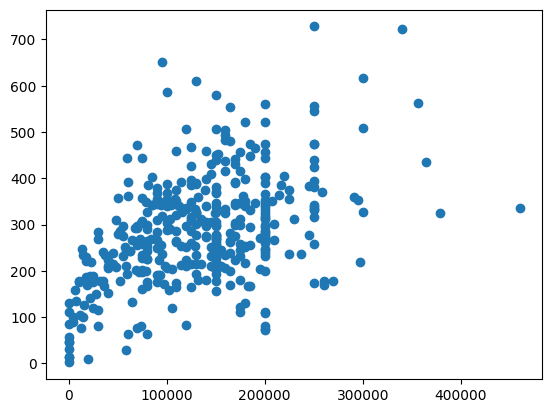

In [26]:
plt.plot(movies_df['budget']/1000, movies_df['top_cast_popularity'] ,'o')

In [106]:
model = KNeighborsRegressor(n_neighbors= 10)
model = RadiusNeighborsRegressor(radius= 10)
movies_df = movies_df.dropna()
# X = movies_df[['budget']]/10000000
X = movies_df[['top_cast_popularity', 'budget']]
X['budget'] = X['budget']/scaling_factor

y = movies_df[['revenue']]/scaling_factor
X.dropna(inplace=True)
y.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


Training set scores: mse 696.472858, mae 16.977190, r2 0.463104
Test set scores: mse 881.567529, mae 24.050395, r2 -0.059671


C:\Users\Iga\AppData\Local\Temp\ipykernel_5608\3106926979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['budget'] = X['budget']/scaling_factor
C:\Users\Iga\AppData\Local\Temp\ipykernel_5608\3106926979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


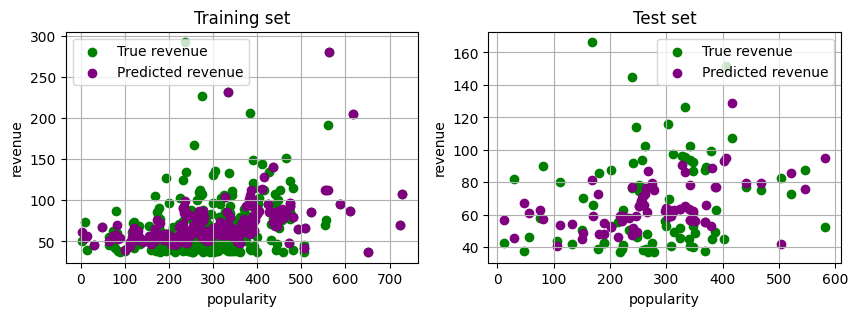

In [107]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train['top_cast_popularity'], y_train, color='green')
ax[0].scatter(X_train['top_cast_popularity'], reg.predict(X_train), color='purple')
ax[0].set_title('Training set')
ax[0].set_xlabel('popularity')
ax[0].set_ylabel('revenue')
ax[0].legend(['True revenue', 'Predicted revenue'])
ax[0].grid()
ax[1].scatter(X_test['top_cast_popularity'], y_test, color='green')
ax[1].scatter(X_test['top_cast_popularity'], reg.predict(X_test), color='purple')
ax[1].set_title('Test set')
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('revenue')
ax[1].legend(['True revenue', 'Predicted revenue'])
ax[1].grid()

plt.show()

# plt.scatter(X_train, y_train, color='green')
# plt.scatter(X_train, reg.predict(X_train), color='purple')

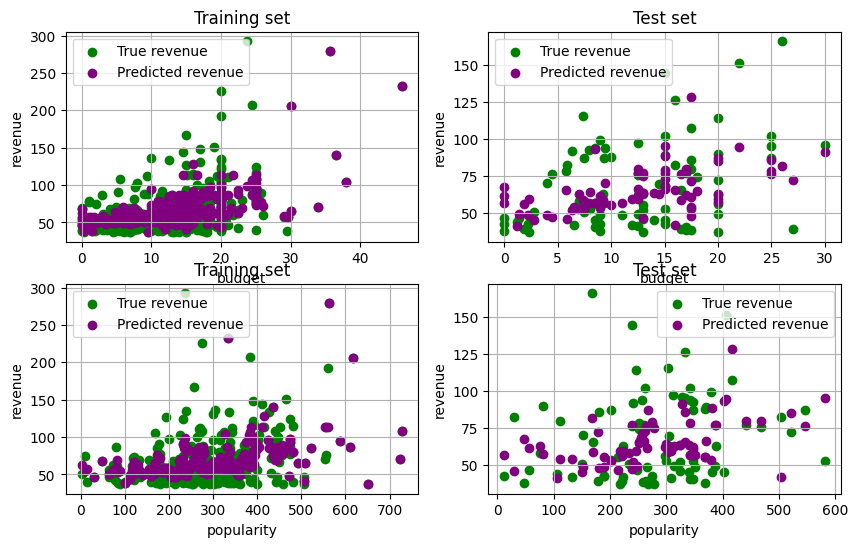

In [108]:
f, ax = plt.subplots(2, 2,figsize=(10, 6))
ax[0,0].scatter(X_train['budget'], y_train, color='green')
ax[0,0].scatter(X_train['budget'], reg.predict(X_train), color='purple')
ax[0,0].set_title('Training set')
ax[0,0].set_xlabel('budget')
ax[0,0].set_ylabel('revenue')
ax[0,0].legend(['True revenue', 'Predicted revenue'])
ax[0,0].grid()
ax[0,1].scatter(X_test['budget'], y_test, color='green')
ax[0,1].scatter(X_test['budget'], reg.predict(X_test), color='purple')
ax[0,1].set_title('Test set')
ax[0,1].set_xlabel('budget')
ax[0,1].set_ylabel('revenue')
ax[0,1].legend(['True revenue', 'Predicted revenue'])
ax[0,1].grid()
ax[1,0].scatter(X_train['top_cast_popularity'], y_train, color='green')
ax[1,0].scatter(X_train['top_cast_popularity'], reg.predict(X_train), color='purple')
ax[1,0].set_title('Training set')
ax[1,0].set_xlabel('popularity')
ax[1,0].set_ylabel('revenue')
ax[1,0].legend(['True revenue', 'Predicted revenue'])
ax[1,0].grid()
ax[1,1].scatter(X_test['top_cast_popularity'], y_test, color='green')
ax[1,1].scatter(X_test['top_cast_popularity'], reg.predict(X_test), color='purple')
ax[1,1].set_title('Test set')
ax[1,1].set_xlabel('popularity')
ax[1,1].set_ylabel('revenue')
ax[1,1].legend(['True revenue', 'Predicted revenue'])
ax[1,1].grid()
plt.show()